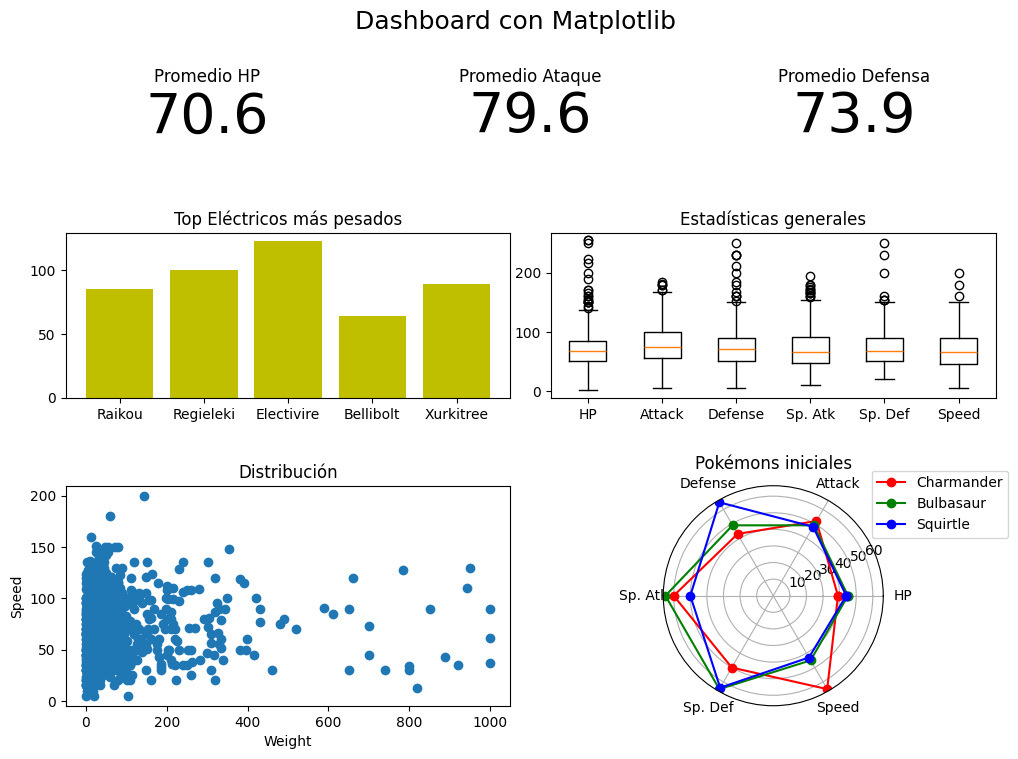

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

pkm=pd.read_csv('pokemon_combined.csv')
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Dashboard con Matplotlib", fontsize=18)
spec = gridspec.GridSpec(ncols=12, nrows=3, figure=fig, hspace=0.6, wspace=1, height_ratios=[1,3,4])

ax1 = fig.add_subplot(spec[0, :4])
ax2 = fig.add_subplot(spec[0, 4:8])
ax3 = fig.add_subplot(spec[0, 8:])
ax4 = fig.add_subplot(spec[1, :6])
ax5 = fig.add_subplot(spec[1, 6:])
ax6 = fig.add_subplot(spec[2, :6])
ax7 = fig.add_subplot(spec[2, 6:], polar=True)

# 1er subplot
hp_promedio = pkm['HP'].mean().__round__(1)
ax1.text(0.5, 0.5, hp_promedio, ha='center', va='center', fontsize=40)
ax1.axis('off')
ax1.set_title('Promedio HP')

# 2do subplot
ataque_promedio = pkm['Attack'].mean().__round__(1)
ax2.text(
    0.5, 
    0.5, 
    ataque_promedio, 
    ha='center', 
    va='center', 
    fontsize=40
)
ax2.axis('off')
ax2.set_title('Promedio Ataque')

# 3er subplot
defensa_promedio = pkm['Defense'].mean().__round__(1)
ax3.text(
    0.5, 
    0.5, 
    defensa_promedio, 
    ha='center', 
    va='center', 
    fontsize=40
)
ax3.axis('off')
ax3.set_title('Promedio Defensa')

#4to subplot
pkm_electric = pkm[pkm['Type'] == 'Electric']
pkm_electric = pkm_electric.sort_values(by=['Weight'],ascending=False)[0:5]
ax4.bar(
    list(pkm_electric['Name']),
    list(pkm_electric['Attack']),
    color="y"
)
ax4.set_title('Top Eléctricos más pesados')

#5to subplot
ax5.boxplot(
    [
        list(pkm['HP']), 
        list(pkm['Attack']), 
        list(pkm['Defense']),
        list(pkm['Sp. Atk']),
        list(pkm['Sp. Def']),
        list(pkm['Speed'])
    ], 
    tick_labels=['HP', 'Attack','Defense','Sp. Atk','Sp. Def','Speed']
)
ax5.set_title('Estadísticas generales')

#6to subplot
ax6.scatter(
    list(pkm['Weight']), 
    list(pkm['Speed'])
)
ax6.set_xlabel('Weight')
ax6.set_ylabel('Speed')
ax6.set_title('Distribución')

#7mo subplot
pkm_seleccion_name = ['Charmander', 'Bulbasaur', 'Squirtle']
pkm_seleccion_name_color = ['red','green','blue']
categories = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']  
N = len(categories)  
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
theta1 = np.append(theta, theta[:1])
c=0
for i in pkm_seleccion_name:
    pkm_seleccion_data = pkm[pkm['Name'] == i][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values[0]
    pkm_seleccion_data1 = np.append(pkm_seleccion_data, pkm_seleccion_data[0])
    ax7.plot(
        theta1, 
        pkm_seleccion_data1, 
        'o-', 
        label=i, 
        color=pkm_seleccion_name_color[c]
    )
    c+=1
ax7.set_thetagrids(theta * 180/np.pi, categories)
ax7.legend()
ax7.grid(True)
ax7.legend(loc='upper right', bbox_to_anchor=(1.6, 1.1))
ax7.set_title('Pokémons iniciales')

plt.show()
fig.savefig("Export_Matplotlib_Dashboard.jpg", dpi=300, bbox_inches='tight')